# Regression Analysis: Predicting Birthweight

## Setup & EDA

In [147]:
# Import libraries (pandas, matplotlib, seaborn, statsmodels category encoders)

import pandas as pd #data science essentials
import numpy as np #mathematical essentials
from sklearn.model_selection import train_test_split#train test split
import statsmodels.formula.api as smf # regression modeling
import statsmodels.api as sm #regression modeling
import category_encoders as ce #encoding categorizal variables into numeric
import matplotlib.pyplot as plt #data visulatization
import seaborn as sns #seaborn
import random #random number generation

In [148]:
# Read data into dataframe 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name (need to change the path accordingly)
file = 'birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(file)


# Preview dataframe; the first 10 rows
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


<br><br> We will drop 'ompas' and 'fmaps' because they obtained after birth therefore they are irrelevant for birthweight.

In [149]:
#dropping 'omaps' and 'fmaps' from columns because those data are obtained after birth and considering time series, it is omitted
birthweight   = birthweight.drop(['omaps','fmaps'],
                                axis = 1)

#Checking whether two columns are dropped from the columns
birthweight.head()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956


In [150]:
#checking the shapes of the datasets
birthweight.shape

(196, 16)

<br><br>

### Null Value Analysis

In [151]:
# Checking for null values in the data, missing value. If"True", it means that there are missing values. If "False" then it means that there are no missing values.
birthweight.isnull().values.any()

True

In [152]:
#Showing counts of missing values from each variable
#Finding number of cells  missing. The missing values are  "meduc","npvis",and"feduc".
birthweight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

<br><br>

There are only 3 variables with less than 7 null values. We will impute these missing values with the median. 

In [153]:
#Fulling out the missing with median
birthweight["meduc"]=birthweight["meduc"].fillna(birthweight['meduc'].median())
birthweight["npvis"]=birthweight["npvis"].fillna(birthweight['npvis'].median())
birthweight["feduc"]=birthweight["feduc"].fillna(birthweight['feduc'].median())

In [154]:
# formatting and printing the dimensions of the data
#Observations: Rows
#Features: Columns

print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     16



In [155]:
# Checking for null values in the data, making sure that there is no missing values after filling out the missing values with median
birthweight.isnull().values.any()

False

<br><br>

### Feature Engineering

A common approach to feature engineering that we learned in class is to identify correlated variables and then divide the first variable by 2 before adding it to the second variable.

1. `m_f_age`: Women have age limit for function to give birth to a baby and men do not. For example, women can bare a child up until in their forties but men can continue to have a family in their eighties. 

2. `cigs_drink`: Alcoholic drinkers may be smokers but they can not drink and smoke at the same time so smokers may drink less than non-smokers. 

3. `m_f_educ`: Educated fathers may be more conscious and take care of their wives and treatment can influence pregnant women.

4. `cigs_meduc`:  Mothers who are more educated may have less possibility of smoking. 

5. `m_meduc` : Educated mothers may go regular checkup even before pregnancy. 

6. `npvis_meduc`: Total number of prenatal visit may be less because educated mothers may be more aware of things that happen during pregnancy.


In [156]:
#Feature Engineering: Combining Features (Resulted in bettter correlation than birthweight['mage']/2+birthweight['fage']
#Feature Number 1
total_age =birthweight['fage']/2+ birthweight['mage']
birthweight['m_f_age']=total_age

#Feature Number 2
total_cd =birthweight['drink']/2+ birthweight['cigs']
birthweight['cigs_drink']=total_cd

#Feature Number 3
total_educ =birthweight['meduc']/2+ birthweight['feduc']
birthweight['m_f_educ']=total_educ

#Feature Number 4
total_educ =birthweight['cigs']/2+ birthweight['meduc']
birthweight['cigs_meduc']=total_educ

#Feature Number 5
total_educ =birthweight['monpre']/2+ birthweight['meduc']
birthweight['m_meduc']=total_educ

#Feature Number 6
total_educ =birthweight['npvis']/2+ birthweight['meduc']
birthweight['npvis_meduc']=total_educ

In [157]:
#Checking the columns that were newly added
birthweight.head()

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_f_age,cigs_drink,m_f_educ,cigs_meduc,m_meduc,npvis_meduc
0,69,14.0,5,2.0,62,14.0,23,9,1,0,1,0,0,1,0,697,100.0,27.5,21.0,25.5,16.5,15.0
1,68,12.0,3,10.0,61,11.0,25,11,1,1,0,0,1,0,0,1290,98.5,30.5,17.0,24.5,13.5,17.0
2,71,12.0,3,6.0,46,12.0,21,12,1,0,1,0,0,1,0,1490,94.0,27.0,18.0,22.5,13.5,15.0
3,59,16.0,1,8.0,48,16.0,21,10,0,0,0,1,0,0,1,1720,83.0,26.0,24.0,26.5,16.5,20.0
4,48,12.0,4,6.0,39,12.0,17,13,0,1,0,0,1,0,0,1956,67.5,23.5,18.0,20.5,14.0,15.0


<br><br>

### Correlation Analysis

- Step 1: identify if any variable correlates with our target variable `birthweight`
- Step 2: identify and drop any variables that have a correlation of > 0.8 to avoid multicollinearity 


<sub><sup><b>Multicollinearity</b> is the occurrence of high inter-correlations among two or more independent variables in a multiple regression model.</sub></sup>

In [158]:
#Identifying the data type of each original variable in the dataset
#Using the groupings of Continuous, interval/count, categorical
#Creating a list of continuous features (including 'mage','fage','feduc','bwght','meduc','cigs','drink','monpre','npvis','m_f_age','cigs_drink','f_m_educ')
continuous_data = ['mage','fage','feduc','bwght','meduc', 'cigs' ,'drink', 'monpre', 'npvis','m_f_age','cigs_drink','m_f_educ','cigs_meduc','m_meduc','npvis_meduc']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with birthweight
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght          1.00
feduc          0.13
m_f_educ       0.13
npvis_meduc    0.10
meduc          0.09
m_meduc        0.08
npvis          0.06
monpre        -0.05
fage          -0.40
cigs_meduc    -0.40
mage          -0.46
m_f_age       -0.49
cigs          -0.57
cigs_drink    -0.68
drink         -0.74
Name: bwght, dtype: float64

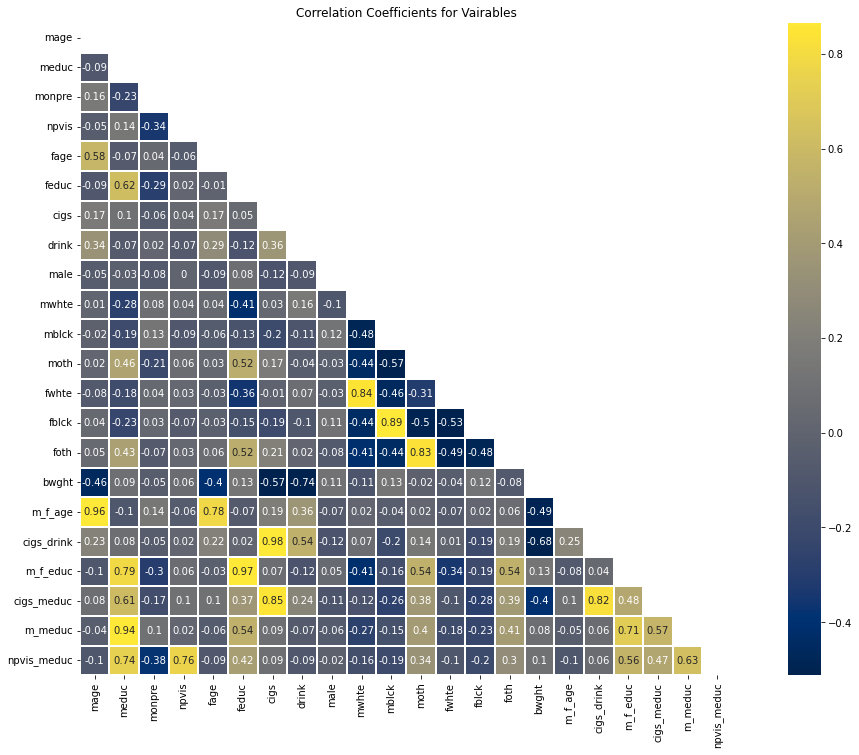

In [159]:
#Calculate and plot correlation coefficients

#Create correlation matrix
corr = birthweight.corr(method = 'pearson').round(decimals = 2)

#Set figure size
fig, ax = plt.subplots(figsize=(20,12))

#Plot lower triangle and remove diagonal
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True    

#Develop heatmap plot
sns.heatmap(data       = corr, # the correlation matrix
           cmap       = 'cividis',     
           robust     = True,
           square     = True,          
           annot      = True,                 
           linewidths = 0.25,
           mask       = mask, 
           annot_kws={"fontsize":10})


#Title & display plot
ax.set_title("Correlation Coefficients for Vairables")
plt.show()

In [160]:
##Avoid Multicollinearity

##Filter out variable with correlation of > 0.8

##Code adapted from:
##https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

##Create an boolean array of our columns and set their values to True
##columns = np.full((corr.shape[0],), True, dtype=bool)

##Loop over variables
#for variable_1 in range(corr.shape[0]):
    
    #Loop over variables again
       #for variable_2 in range(variable_1 + 1, corr.shape[0]):
        
        #If the correlation b/w variable 1 & 2 is equal to or greater than 0.8
           #if corr.iloc[variable_1, variable_2] >= 0.8:
            
            #Set the boolean of that variable to False
               #if columns[variable_2]:
                #columns[variable_2] = False
                
##Finalized list of variables with no multicollinearity                
##selected_columns = birthweight.columns[columns]

##Remove variables that are highly correlated
#birthweight = birthweight[selected_columns]

In [161]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght
m_f_age
cigs_drink
m_f_educ
cigs_meduc
m_meduc
npvis_meduc


In [162]:
# displaying the LAST 5 rows of the DataFrame
birthweight.tail(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_f_age,cigs_drink,m_f_educ,cigs_meduc,m_meduc,npvis_meduc
191,30,12.0,5,12.0,38,14.0,3,2,1,0,1,0,0,0,1,4610,49.0,4.0,20.0,13.5,14.5,18.0
192,41,14.0,2,12.0,47,16.0,10,4,1,0,1,0,0,1,0,4660,64.5,12.0,23.0,19.0,15.0,20.0
193,33,15.0,2,15.0,38,13.0,0,1,0,1,0,0,1,0,0,4678,52.0,0.5,20.5,15.0,16.0,22.5
194,31,17.0,2,6.0,43,14.0,8,4,1,0,1,0,0,1,0,4791,52.5,10.0,22.5,21.0,18.0,20.0
195,39,17.0,2,10.0,38,12.0,0,0,0,0,0,1,1,0,0,4933,58.0,0.0,20.5,17.0,18.0,22.0


In [163]:
#Information about each variable (float, int)
#Dividing into CONTINUOUS and CATEGORICAL/Other
#mage,fage,feduc, meduc, cigs, drink, monpre, npvis, bwght(Y-variable), m_f_agee, cigs_drink, m_f_edu(Note: Previously dropped columns are #omaps, #fmaps)
#INTERVAL/COUNT:None
#CATEGORICAL/OTHER
#male, mwhte mblck moth fwhte fblck foth
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mage         196 non-null    int64  
 1   meduc        196 non-null    float64
 2   monpre       196 non-null    int64  
 3   npvis        196 non-null    float64
 4   fage         196 non-null    int64  
 5   feduc        196 non-null    float64
 6   cigs         196 non-null    int64  
 7   drink        196 non-null    int64  
 8   male         196 non-null    int64  
 9   mwhte        196 non-null    int64  
 10  mblck        196 non-null    int64  
 11  moth         196 non-null    int64  
 12  fwhte        196 non-null    int64  
 13  fblck        196 non-null    int64  
 14  foth         196 non-null    int64  
 15  bwght        196 non-null    int64  
 16  m_f_age      196 non-null    float64
 17  cigs_drink   196 non-null    float64
 18  m_f_educ     196 non-null    float64
 19  cigs_med

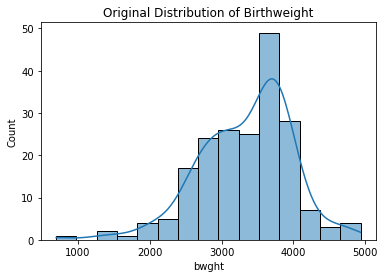

In [164]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [165]:
# descriptive statistics for numeric data
birthweight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,m_f_age,cigs_drink,m_f_educ,cigs_meduc,m_meduc,npvis_meduc
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.61,39.29,13.85,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09,59.80,13.63,20.81,19.38,15.08,19.72
std,10.25,2.04,1.36,4.23,8.98,2.59,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70,13.38,6.78,3.32,3.84,1.99,3.14
min,23.00,8.00,1.00,2.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00,37.00,0.00,6.50,9.50,10.00,11.50
25%,33.00,12.00,2.00,10.00,34.75,12.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25,51.00,8.88,18.00,16.50,13.00,17.50
50%,39.00,14.00,2.00,12.00,38.00,14.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00,56.50,14.00,20.75,19.00,15.00,20.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50,66.00,18.50,24.00,22.50,17.00,22.00
max,71.00,17.00,8.00,35.00,73.00,17.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00,100.00,30.50,25.50,28.50,20.00,32.00


<br><br>

We have to drop one of the three categorical variable stratum from this set of variables:
1. `mowhte`
2. `moblck`
3. `moth`

We are going to drop `moth`

In [166]:
birthweight = birthweight.drop(labels = "moth",axis=1)

<br><br>
## Model Analysis
1. OLS Regression Model
2. Lasso
3. Bayesian Automatic Relevance Determination (ARD)

<br><br>

### Model 01: OLS Regression

For our regression model, we will be utilizing Backward elimination for our feature selection strategy.
Backward elimination is a feature selection technique used to remove those features that do not have a significant effect on the dependent variable or prediction of output. In our case, significance is based on whether or not the variable results with a p-value of <= 0.05.

In [167]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

# Step 1: Instantiate a model object
lm_best = smf.ols(formula = """bwght ~ mage
                                    + meduc
                                    + monpre
                                    + npvis
                                    + fage
                                    + feduc
                                    + cigs
                                    + drink
                                    + male
                                    + mwhte
                                    + mblck
                                    + m_f_age
                                    + cigs_drink
                                    + cigs_meduc
                                    + m_meduc
                                    + npvis_meduc
                                    + m_f_educ""",
                                      data = birthweight)


# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the summary output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     41.96
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           2.39e-44
Time:                        21:05:20   Log-Likelihood:                -1423.1
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     184   BIC:                             2910.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4536.7272    306.611     14.796      

In [168]:
#Select only p-value that is less than 0.05 (Omit 'meduc', 'monpre','npvis', 'fage', 'feduc', 'cigs', 'male', 'cigs_meduc', 'm_meduc',
#'npvis_meduc', 'm_f_edu')
X, y = birthweight[['mage','drink', 
                    'm_f_age','cigs_drink']], birthweight.bwght

In [169]:
#Printing the demension of X and y
print(X.shape,y.shape)

(196, 4) (196,)


In [170]:
#Counting null 
X.isna().sum()

mage          0
drink         0
m_f_age       0
cigs_drink    0
dtype: int64

In [171]:
#Fit the data object into define object
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#display adjusted R-squared
#Source:https://www.statology.org/adjusted-r-squared-in-python/
print(model.rsquared_adj)

0.7019924036604593


/Users/eri/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [172]:
#Display the summary of OLS Regression Results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.83e-50
Time:                        21:05:20   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     191   BIC:                             2877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5022.2938    123.301     40.732      0.000    4779.088    5265.499
mage          -1.0637      9.057     -0.117      0.907     -18.929      16.801
drink        -98.5977     10.412     -9.470      0.000    -119.135     -78.060
m_f_age      -10.4827      6.998     -1.498      0.136     -24.287       3.321
cigs_drink   -35.6938      4.448     -8.024      0.000     -44.468     -26.920
==============================================================================
Omnibus:                        5.262   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                7.494
Skew:                          -0.057   Prob(JB):                       0.0236
Kurtosis:                       3.951   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
#improting additional package
from sklearn.linear_model import LinearRegression

In [174]:
#Linear Regression Model
model = LinearRegression()
model.fit(X, y)

#display adjusted R-squared
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7004239426270933

In [175]:
# Step 1: Instantiate a model object
lm_best = smf.ols(formula = """bwght ~ mage
                                     + drink
                                     + m_f_age
                                     + cigs_drink""",
                                  data = birthweight)

X = sm.add_constant(X)
# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.83e-50
Time:                        21:05:20   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2861.
Df Residuals:                     191   BIC:                             2877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5022.2938    123.301     40.732      0.0

/Users/eri/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [176]:
# Step 1: Instantiate a model object
lm_best = smf.ols(formula = """bwght ~ drink
                                     + m_f_age
                                     + cigs_drink""",
                                  data = birthweight)

X = sm.add_constant(X)
# Step 2: Fit the data into the model object
results = lm_best.fit()


# Step 3: Analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     155.2
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           4.32e-51
Time:                        21:05:20   Log-Likelihood:                -1425.4
No. Observations:                 196   AIC:                             2859.
Df Residuals:                     192   BIC:                             2872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5026.3396    118.086     42.565      0.0

/Users/eri/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<br><br>

#### Split the Data into training and testing

In [177]:
#Preparing for Model Development
#Split dataset into training and testing sets
y=birthweight["bwght"]

In [178]:
#Dropping categorical variables after they have been encoded
X=birthweight.drop("bwght",axis=1)

In [179]:
#declaring set of x-variables
x_variables = ['drink', 'm_f_age','cigs_drink']

# x_variables = ["drink","cigs_drink",'m_f_age']

In [180]:
#defining X
X = X[x_variables]

In [181]:
# split data into test and train sets
# Random state set to None to randomize the selection, 
# train_test_split will return different results for each execution (splits data randomly each time)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 219)

In [182]:
# checking the shape of test and train data

print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")



Training Data
-------------
X-side: (147, 3)
y-side: 147


Testing Data
------------
X-side: (49, 3)
y-side: 49



In [183]:
# check again for missing values in train and test data after imputation
print("Train data \n",x_train.isnull().sum())
print("Test data \n",x_train.isnull().sum())

Train data 
 drink         0
m_f_age       0
cigs_drink    0
dtype: int64
Test data 
 drink         0
m_f_age       0
cigs_drink    0
dtype: int64


In [184]:
#Importing packages and datasets
from sklearn.preprocessing import StandardScaler # Standard Scaler
from sklearn.linear_model import Lasso, ARDRegression, LinearRegression#Lasso, ARD Regression, Linear Regression
from sklearn.neighbors import KNeighborsRegressor #KNN for Regressioin

In [185]:
#Linear Regression
# Initiating a model object
lr = LinearRegression()


# Fitting to the training data
lr_fit = lr.fit(x_train, y_train)

# Predicting on new data
lr_pred = lr_fit.predict(x_test)


# Scoring the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# zipping each feature name to its coefficient
lr_model_values = zip(birthweight[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

OLS Training Score : 0.7135
OLS Testing Score  : 0.663
('intercept', 5178.98)
('drink', -90.47)
('m_f_age', -13.89)
('cigs_drink', -37.12)


In [186]:
#Linear Regression
# Instantiating a model object
lr = LinearRegression()


# Fitting to the training data
lr_fit = lr.fit(x_train, y_train)


# Predicting on new data
lr_pred = lr_fit.predict(x_test)


# Scoring the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square
# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)



OLS Training Score : 0.7135
OLS Testing Score  : 0.663
OLS Train-Test Gap : 0.0505


In [187]:
#Linear Regression
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)


('intercept', 5178.98)
('drink', -90.47)
('m_f_age', -13.89)
('cigs_drink', -37.12)


<br><br>
### Model 02: Lasso

In [188]:
lasso_model = Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# fitting to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# predicting on new data
lasso_pred = lasso_fit.predict(x_test)


#　scoring the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


Lasso Training Score : 0.7129
Lasso Testing Score  : 0.6684
Lasso Train-Test Gap : 0.0445


In [189]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight[x_variables].columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 5118.43)
('drink', -88.74)
('m_f_age', -13.27)
('cigs_drink', -36.11)
('intercept', 5118.43)
('drink', -88.74)
('m_f_age', -13.27)
('cigs_drink', -36.11)


In [190]:
# declaring set of x-variables
x_variables = ['drink', 'm_f_age','cigs_drink']
# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

drink +
m_f_age +
cigs_drink +


<br><br>

### Model 03: ADR Regression

In [191]:
# Instantiating a model object
ard_model = ARDRegression(normalize  = False)


# Fitting the training data
ard_fit = ard_model.fit(x_train, y_train)


# Predicting on new data
ard_pred = ard_fit.predict(x_train)

# printing training score and testing score
print('ARD Training Score:', ard_model.score(x_train, y_train).round(4))
print('ARD Testing Score :',  ard_model.score(x_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train, y_train).round(4)
ard_test_score  = ard_model.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
Ard_result=print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score: 0.7134
ARD Testing Score : 0.6658
ARD Train-Test Gap : 0.0476


In [192]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight[x_variables].columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 5156.7)
('drink', -90.22522)
('m_f_age', -13.60675)
('cigs_drink', -36.83655)
('intercept', 5156.7)
('drink', -90.22522)
('m_f_age', -13.60675)
('cigs_drink', -36.83655)


In [193]:
# comparing results
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

model_performance = pd.DataFrame(model_performance)


# sending model results to Excel(Create a file and name it. Specifiy the path where this file will be saved.)
model_performance.to_csv('birthwegiht_regression_analysis.csv',
                           index = False)



<br><br>
## Final Model

In [199]:
#Displaying the final model and other two models with gap between train and test dataa
#Defining OLS_training, OLS_testing, OLS_gap
OLS_training=0.7135
OLS_testing=0.663
OLS_gap=0.0505
 
#Defining Lass_training, Lasso_testing, Lasso_gap
Lasso_training=0.713
Lasso_testing=0.6685
Lasso_gap=0.0445

#Defining Ard_training, Ard_testing, Ard_gap
Ard_training=0.7134
Ard_testing=0.6658
Ard_gap=0.0476

print(f"""

OLS Regression
----------------------------------

Training Set: {OLS_training}
Testing Set:{OLS_testing}
Gap:{OLS_gap}

Lasso Regression ***FINAL MODEL***
----------------------------------

Training Set:{Lasso_training}
Testing Set:{Lasso_testing}
Gap:{Lasso_gap}

ARD Regression
----------------------------------
Training Set: {Ard_training}
Testing Set:{Ard_testing}
Gap:{Ard_gap}
"""
     
     )




OLS Regression
----------------------------------

Training Set: 0.7135
Testing Set:0.663
Gap:0.0505

Lasso Regression ***FINAL MODEL***
----------------------------------

Training Set:0.713
Testing Set:0.6685
Gap:0.0445

ARD Regression
----------------------------------
Training Set: 0.7134
Testing Set:0.6658
Gap:0.0476

